# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

## Next Steps####:

1) Extend the Date Range: Analyze seasonal trends by fetching data over several months.
   Specified date range as following:
   # Date range
    start_date = '2022-11-01'
    end_date = '2023-01-08'
   
3) Fetch Additional Variables: Include wind speed, atmospheric pressure, or other interesting variables.
   Specified variables as following:
   hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation','wind_speed_10m', 'pressure_msl', 'showers', 'rain', 'snowfall']



4) Forecasting: Use statistical methods or machine learning models to forecast future weather patterns.
5) Global Analysis: Compare data from other global cities to gain broader insights.
•	# Location coordinates for Hanover City
•	latitude = 18.3894
•	longitude = -78.1295
•	     'timezone': 'America/New_York'
•	
•	plt.title('Temperature Over Time in Hanover City')
•	plt.title('Relative Humidity Over Time in Hanover City')
•	plt.title('Precipitation Over Time in Hanover City')
•	plt.title('Daily Average Temperature in Hanover City')
•	plt.title('Daily Average Temperature: Hanover vs Los Angeles')
•	    'Hanover': daily_avg['temperature_2m'],
•	# Step 9: Advanced Analysis - Temperature Difference
•	print("Available columns:", combined_temp.columns.tolist())
•	
•	# Calculate Temperature Difference
•	combined_temp['Temp Difference'] = combined_temp['Hanover'] - combined_temp['Los Angeles']
•	combined_temp


      

   

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
!pip install requests pandas matplotlib

In [235]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [304]:
# Step 1: Set Up Parameters

# Location coordinates for Hanover City
latitude = 18.3894
longitude = -78.1295

# Date range
start_date = '2022-11-01'
end_date = '2023-01-08'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation','wind_speed_10m', 'pressure_msl', 'showers', 'rain', 'snowfall']


In [305]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [306]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [307]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,showers,rain,snowfall
0,2022-11-01T00:00,23.0,91,0.0,12.4,1012.0,0.0,0.0,0.0
1,2022-11-01T01:00,23.0,90,0.0,11.4,1011.7,0.0,0.0,0.0
2,2022-11-01T02:00,22.8,90,0.0,9.0,1011.6,0.0,0.0,0.0
3,2022-11-01T03:00,22.7,90,0.0,8.6,1011.1,0.0,0.0,0.0
4,2022-11-01T04:00,22.6,91,0.0,8.3,1011.0,0.0,0.0,0.0


In [308]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
wind_speed_10m         0
pressure_msl           0
showers                0
rain                   0
snowfall               0
dtype: int64

In [309]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\pande\AppData\Local\Temp\ipykernel_8716\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [310]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,showers,rain,snowfall
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.0,1656.000000,1656.0
mean,23.984964,81.240338,0.078442,8.889976,1014.802899,0.0,0.078442,0.0
std,2.885465,12.845358,0.339344,4.157291,2.061022,0.0,0.339344,0.0
min,17.700000,48.000000,0.000000,0.000000,1008.400000,0.0,0.000000,0.0
25%,21.700000,70.000000,0.000000,5.775000,1013.500000,0.0,0.000000,0.0
50%,23.300000,85.000000,0.000000,8.700000,1015.000000,0.0,0.000000,0.0
75%,26.700000,92.000000,0.000000,11.125000,1016.200000,0.0,0.000000,0.0
max,30.600000,100.000000,7.000000,23.500000,1019.600000,0.0,7.000000,0.0


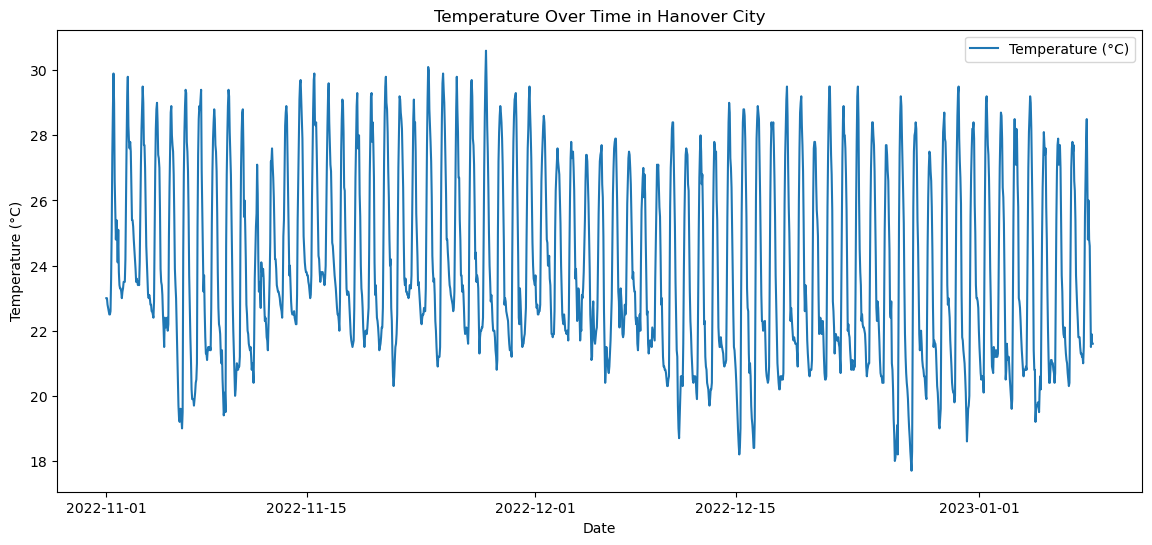

In [311]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in Hanover City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

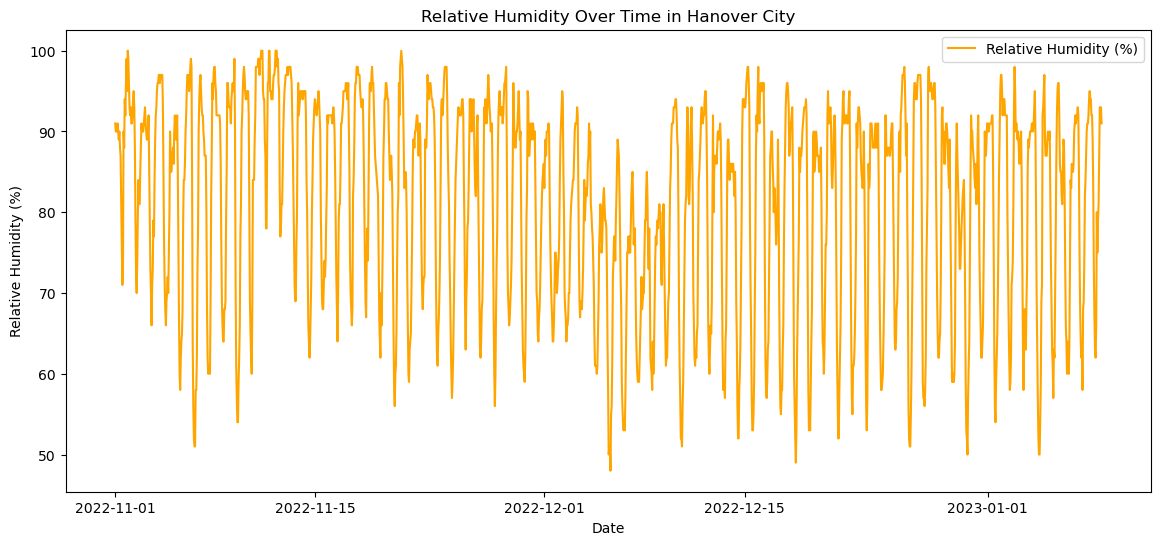

In [312]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in Hanover City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


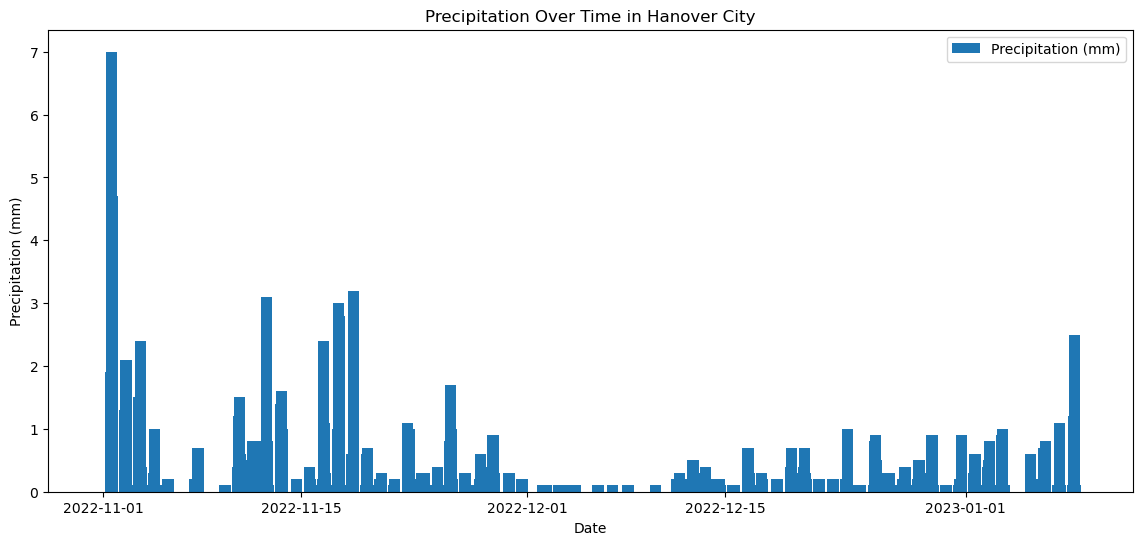

In [313]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in Hanover City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [314]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: -0.83


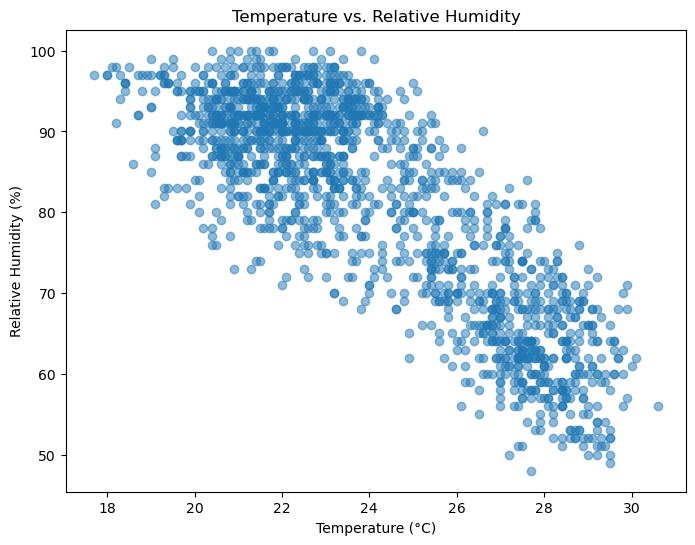

In [315]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [316]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,showers,rain,snowfall
time,,,,,,,,
2022-11-01,24.695833,89.416667,0.575000,5.825000,1013.337500,0.0,0.575000,0.0
2022-11-02,25.600000,86.541667,0.233333,9.937500,1015.054167,0.0,0.233333,0.0
2022-11-03,25.341667,84.958333,0.300000,12.262500,1013.983333,0.0,0.300000,0.0
2022-11-04,24.783333,84.041667,0.066667,10.345833,1012.366667,0.0,0.066667,0.0
2022-11-05,24.383333,80.250000,0.016667,5.937500,1010.429167,0.0,0.016667,0.0


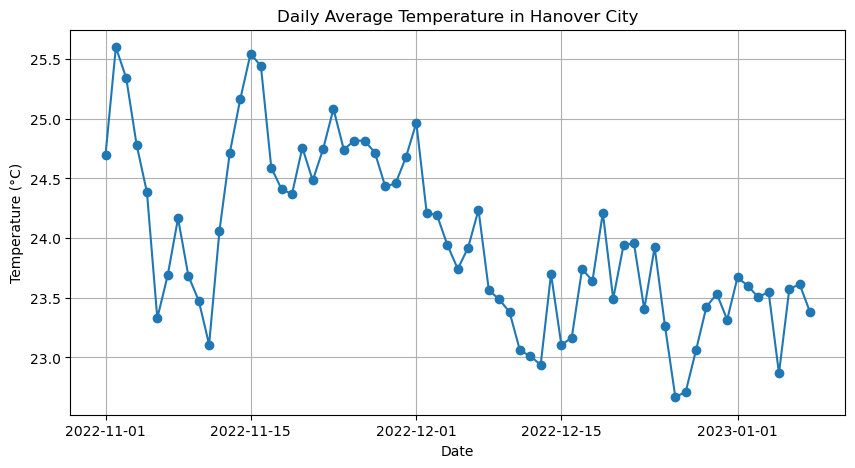

In [317]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in Hanover City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [318]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\pande\AppData\Local\Temp\ipykernel_8716\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [319]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [320]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'Hanover': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


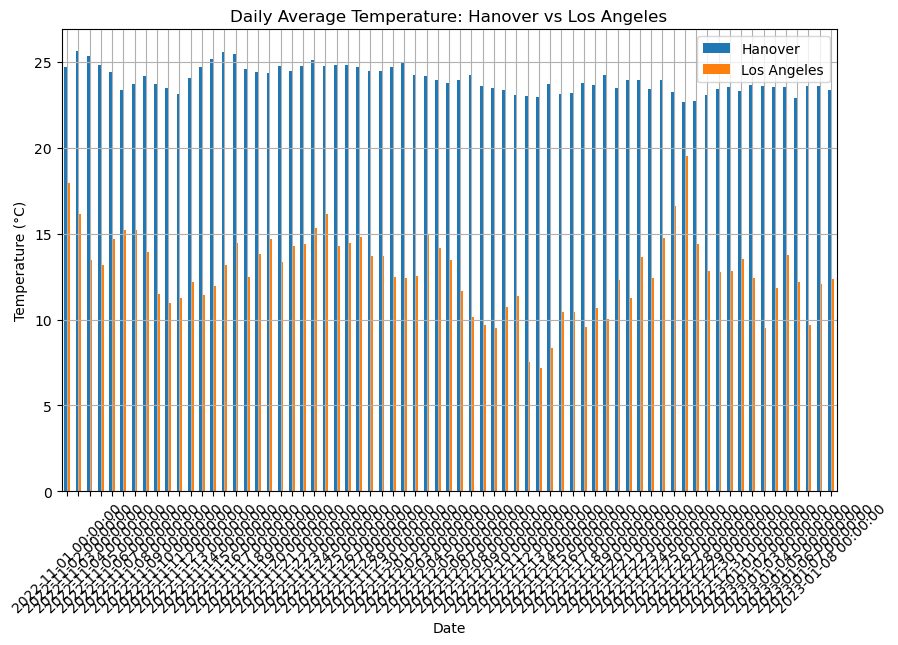

In [321]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: Hanover vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [322]:
# Step 9: Advanced Analysis - Temperature Difference
print("Available columns:", combined_temp.columns.tolist())

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Hanover'] - combined_temp['Los Angeles']
combined_temp


Available columns: ['Hanover', 'Los Angeles']


,Hanover,Los Angeles,Temp Difference
time,,,
2022-11-01,24.695833,17.950000,6.745833
2022-11-02,25.600000,16.166667,9.433333
2022-11-03,25.341667,13.450000,11.891667
2022-11-04,24.783333,13.195833,11.587500
2022-11-05,24.383333,14.712500,9.670833
...,...,...,...
2023-01-04,23.550000,13.766667,9.783333
2023-01-05,22.866667,12.183333,10.683333
2023-01-06,23.575000,9.662500,13.912500


In [324]:
# Step 10: Save Data to CSV (Optional)

# Save Hanover data
df.to_csv('hanover_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_new_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **Hanover** and **Los Angeles**.

---

**Next Steps**:

This file is for next steps since used Hanover city and Los Angeles comparison.


In [325]:
weather_data = pd.read_csv('hanover_weather.csv', index_col="time")
weather_data.head().T

time,2022-11-01 00:00:00,2022-11-01 01:00:00,2022-11-01 02:00:00,2022-11-01 03:00:00,2022-11-01 04:00:00
temperature_2m,23.0,23.0,22.8,22.7,22.6
relativehumidity_2m,91.0,90.0,90.0,90.0,91.0
precipitation,0.0,0.0,0.0,0.0,0.0
wind_speed_10m,12.4,11.4,9.0,8.6,8.3
pressure_msl,1012.0,1011.7,1011.6,1011.1,1011.0
showers,0.0,0.0,0.0,0.0,0.0
rain,0.0,0.0,0.0,0.0,0.0
snowfall,0.0,0.0,0.0,0.0,0.0


In [326]:
weather_data.shape

(1656, 8)

In [328]:
#Checking how what is the null percentage for any column.
null_pct = weather_data.apply(pd.isnull).sum()/weather_data.shape[0]

In [329]:
#Checking how what is the null percentage for any column.
print(null_pct)

temperature_2m         0.0
relativehumidity_2m    0.0
precipitation          0.0
wind_speed_10m         0.0
pressure_msl           0.0
showers                0.0
rain                   0.0
snowfall               0.0
dtype: float64


In [330]:
weather_data.apply(pd.isnull).sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
wind_speed_10m         0
pressure_msl           0
showers                0
rain                   0
snowfall               0
dtype: int64

In [331]:
weather_data[weather_data.isnull()]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,showers,rain,snowfall
time,,,,,,,,
2022-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
type(weather_data)

pandas.core.frame.DataFrame

In [333]:
weather_data[weather_data.isnull()]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,showers,rain,snowfall
time,,,,,,,,
2022-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
weather_data[weather_data.isna()]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,showers,rain,snowfall
time,,,,,,,,
2022-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
weather_data = weather_data.fillna(0)

In [335]:
#Checking and Removing any column where lot of missing data is present.
valid_columns = weather_data.columns[null_pct < .05]
valid_columns

Index(['temperature_2m', 'relativehumidity_2m', 'precipitation',
       'wind_speed_10m', 'pressure_msl', 'showers', 'rain', 'snowfall'],
      dtype='object')

In [336]:
# Check and fill the last non missing data into the missing column.
weather_data = weather_data.ffill()

In [337]:
#Check if there are still any missing values.
weather_data.apply(pd.isnull).sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
wind_speed_10m         0
pressure_msl           0
showers                0
rain                   0
snowfall               0
dtype: int64

In [338]:
#Check data type.
weather_data.dtypes


temperature_2m         float64
relativehumidity_2m      int64
precipitation          float64
wind_speed_10m         float64
pressure_msl           float64
showers                float64
rain                   float64
snowfall               float64
dtype: object

In [339]:
weather_data.index

Index(['2022-11-01 00:00:00', '2022-11-01 01:00:00', '2022-11-01 02:00:00',
       '2022-11-01 03:00:00', '2022-11-01 04:00:00', '2022-11-01 05:00:00',
       '2022-11-01 06:00:00', '2022-11-01 07:00:00', '2022-11-01 08:00:00',
       '2022-11-01 09:00:00',
       ...
       '2023-01-08 14:00:00', '2023-01-08 15:00:00', '2023-01-08 16:00:00',
       '2023-01-08 17:00:00', '2023-01-08 18:00:00', '2023-01-08 19:00:00',
       '2023-01-08 20:00:00', '2023-01-08 21:00:00', '2023-01-08 22:00:00',
       '2023-01-08 23:00:00'],
      dtype='object', name='time', length=1656)

In [340]:
#Changing weather_data index("time column") to datetime type.
weather_data.index = pd.to_datetime(weather_data.index)

In [341]:
weather_data.index

DatetimeIndex(['2022-11-01 00:00:00', '2022-11-01 01:00:00',
               '2022-11-01 02:00:00', '2022-11-01 03:00:00',
               '2022-11-01 04:00:00', '2022-11-01 05:00:00',
               '2022-11-01 06:00:00', '2022-11-01 07:00:00',
               '2022-11-01 08:00:00', '2022-11-01 09:00:00',
               ...
               '2023-01-08 14:00:00', '2023-01-08 15:00:00',
               '2023-01-08 16:00:00', '2023-01-08 17:00:00',
               '2023-01-08 18:00:00', '2023-01-08 19:00:00',
               '2023-01-08 20:00:00', '2023-01-08 21:00:00',
               '2023-01-08 22:00:00', '2023-01-08 23:00:00'],
              dtype='datetime64[ns]', name='time', length=1656, freq=None)

In [342]:
weather_data.index.value_counts().sort_index()

time
2022-11-01 00:00:00    1
2022-11-01 01:00:00    1
2022-11-01 02:00:00    1
2022-11-01 03:00:00    1
2022-11-01 04:00:00    1
                      ..
2023-01-08 19:00:00    1
2023-01-08 20:00:00    1
2023-01-08 21:00:00    1
2023-01-08 22:00:00    1
2023-01-08 23:00:00    1
Name: count, Length: 1656, dtype: int64

In [343]:
weather_data

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,showers,rain,snowfall
time,,,,,,,,
2022-11-01 00:00:00,23.0,91,0.0,12.4,1012.0,0.0,0.0,0.0
2022-11-01 01:00:00,23.0,90,0.0,11.4,1011.7,0.0,0.0,0.0
2022-11-01 02:00:00,22.8,90,0.0,9.0,1011.6,0.0,0.0,0.0
2022-11-01 03:00:00,22.7,90,0.0,8.6,1011.1,0.0,0.0,0.0
2022-11-01 04:00:00,22.6,91,0.0,8.3,1011.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,23.1,87,0.0,5.3,1016.1,0.0,0.0,0.0
2023-01-08 20:00:00,21.5,93,0.0,6.0,1016.7,0.0,0.0,0.0
2023-01-08 21:00:00,21.9,93,0.0,8.6,1017.2,0.0,0.0,0.0


In [344]:
#Check if there are still any missing values.
weather_data.apply(pd.isnull).sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
wind_speed_10m         0
pressure_msl           0
showers                0
rain                   0
snowfall               0
dtype: int64

In [345]:
#Getting one row above data for future prediction.
weather_data_updated["futureTemp"] = weather_data_updated.shift(-1)["temperature_2m"]

In [346]:
weather_data_updated

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,
2022-11-01 00:00:00,23.0,91,0.0,12.4,1012.0,0.0,0.0,23.0
2022-11-01 01:00:00,23.0,90,0.0,11.4,1011.7,0.0,0.0,22.8
2022-11-01 02:00:00,22.8,90,0.0,9.0,1011.6,0.0,0.0,22.7
2022-11-01 03:00:00,22.7,90,0.0,8.6,1011.1,0.0,0.0,22.6
2022-11-01 04:00:00,22.6,91,0.0,8.3,1011.0,0.0,0.0,22.5
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,23.1,87,0.0,5.3,1016.1,0.0,0.0,21.5
2023-01-08 20:00:00,21.5,93,0.0,6.0,1016.7,0.0,0.0,21.9
2023-01-08 21:00:00,21.9,93,0.0,8.6,1017.2,0.0,0.0,21.6


In [347]:
weather_data_updated = weather_data_updated.ffill()

In [348]:
weather_data_updated

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,
2022-11-01 00:00:00,23.0,91,0.0,12.4,1012.0,0.0,0.0,23.0
2022-11-01 01:00:00,23.0,90,0.0,11.4,1011.7,0.0,0.0,22.8
2022-11-01 02:00:00,22.8,90,0.0,9.0,1011.6,0.0,0.0,22.7
2022-11-01 03:00:00,22.7,90,0.0,8.6,1011.1,0.0,0.0,22.6
2022-11-01 04:00:00,22.6,91,0.0,8.3,1011.0,0.0,0.0,22.5
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,23.1,87,0.0,5.3,1016.1,0.0,0.0,21.5
2023-01-08 20:00:00,21.5,93,0.0,6.0,1016.7,0.0,0.0,21.9
2023-01-08 21:00:00,21.9,93,0.0,8.6,1017.2,0.0,0.0,21.6


In [350]:
weather_data_updated.corr()

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
temperature_2m,1.000000,-0.830080,0.235729,0.299596,-0.073335,0.235729,NaN,0.939289
relativehumidity_2m,-0.830080,1.000000,-0.112781,-0.403522,-0.066539,-0.112781,NaN,-0.781113
precipitation,0.235729,-0.112781,1.000000,-0.024901,-0.092757,1.000000,NaN,0.186404
wind_speed_10m,0.299596,-0.403522,-0.024901,1.000000,0.244184,-0.024901,NaN,0.336052
pressure_msl,-0.073335,-0.066539,-0.092757,0.244184,1.000000,-0.092757,NaN,0.013173
rain,0.235729,-0.112781,1.000000,-0.024901,-0.092757,1.000000,NaN,0.186404
snowfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
futureTemp,0.939289,-0.781113,0.186404,0.336052,0.013173,0.186404,NaN,1.000000


In [351]:
weather_data_updated = weather_data_updated.ffill()

In [352]:
weather_data_updated.corr()

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
temperature_2m,1.000000,-0.830080,0.235729,0.299596,-0.073335,0.235729,NaN,0.939289
relativehumidity_2m,-0.830080,1.000000,-0.112781,-0.403522,-0.066539,-0.112781,NaN,-0.781113
precipitation,0.235729,-0.112781,1.000000,-0.024901,-0.092757,1.000000,NaN,0.186404
wind_speed_10m,0.299596,-0.403522,-0.024901,1.000000,0.244184,-0.024901,NaN,0.336052
pressure_msl,-0.073335,-0.066539,-0.092757,0.244184,1.000000,-0.092757,NaN,0.013173
rain,0.235729,-0.112781,1.000000,-0.024901,-0.092757,1.000000,NaN,0.186404
snowfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
futureTemp,0.939289,-0.781113,0.186404,0.336052,0.013173,0.186404,NaN,1.000000


In [353]:
weather_data_updated

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,
2022-11-01 00:00:00,23.0,91,0.0,12.4,1012.0,0.0,0.0,23.0
2022-11-01 01:00:00,23.0,90,0.0,11.4,1011.7,0.0,0.0,22.8
2022-11-01 02:00:00,22.8,90,0.0,9.0,1011.6,0.0,0.0,22.7
2022-11-01 03:00:00,22.7,90,0.0,8.6,1011.1,0.0,0.0,22.6
2022-11-01 04:00:00,22.6,91,0.0,8.3,1011.0,0.0,0.0,22.5
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,23.1,87,0.0,5.3,1016.1,0.0,0.0,21.5
2023-01-08 20:00:00,21.5,93,0.0,6.0,1016.7,0.0,0.0,21.9
2023-01-08 21:00:00,21.9,93,0.0,8.6,1017.2,0.0,0.0,21.6


In [354]:
weather_data_updated[weather_data_updated.isnull().any(axis=1)]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,


In [284]:
weather_data_updated[weather_data_updated.isnull()]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,
2022-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
weather_data_updated['temperature_2m'] = df['temperature_2m'].fillna(0)  # Replace NaN with 0


In [356]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as needed
weather_data_updated['temperature_2m'] = imputer.fit_transform(df[['temperature_2m']])


In [357]:
weather_data_updated[weather_data_updated.isnull()].ffill()

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,
2022-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
weather_data_updated['temperature_2m'] = weather_data_updated['temperature_2m'].fillna(method='ffill')  # Forward fill
weather_data_updated['temperature_2m'] = weather_data_updated['temperature_2m'].fillna(method='bfill')  # Backward fill


C:\Users\pande\AppData\Local\Temp\ipykernel_8716\1513124996.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data_updated['temperature_2m'] = weather_data_updated['temperature_2m'].fillna(method='ffill')  # Forward fill
C:\Users\pande\AppData\Local\Temp\ipykernel_8716\1513124996.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data_updated['temperature_2m'] = weather_data_updated['temperature_2m'].fillna(method='bfill')  # Backward fill


In [358]:
weather_data_updated[weather_data_updated.isnull()]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,
2022-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
#Ridge regression model.
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [361]:
predictors = weather_data_updated.columns[~weather_data_updated.columns.isin(["futureTemp","time"])]

In [362]:
predictors

Index(['temperature_2m', 'relativehumidity_2m', 'precipitation',
       'wind_speed_10m', 'pressure_msl', 'rain', 'snowfall'],
      dtype='object')

In [363]:
#Creating function for back date testing.
def backtest(weather_data_updated, model, predictors, start = 1000, step=90):
    all_predictions = []
    for i in range(start, weather_data_updated.shape[0], step):
        train = weather_data_updated.iloc[:i,:]
        test = weather_data_updated.iloc[i:(i+step), :]
        model.fit(train[predictors], train["futureTemp"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["futureTemp"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [364]:


predictions = backtest(weather_data_updated, rr, predictors)

In [365]:
predictions

,actual,prediction,diff
time,,,
2022-12-12 16:00:00,25.6,26.446896,0.846896
2022-12-12 17:00:00,24.0,25.192328,1.192328
2022-12-12 18:00:00,22.2,23.806383,1.606383
2022-12-12 19:00:00,22.3,22.269943,0.030057
2022-12-12 20:00:00,21.2,22.373645,1.173645
...,...,...,...
2023-01-08 19:00:00,21.5,23.244976,1.744976
2023-01-08 20:00:00,21.9,21.830228,0.069772
2023-01-08 21:00:00,21.6,22.360168,0.760168


In [366]:
#Check accuracy.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

0.8382736984706116

In [368]:
weather_data_updated[weather_data_updated.isnull().any(axis=1)]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,


In [185]:
weather_data_updated[weather_data_updated.isnull().any(axis=1)]

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp
time,,,,,,,,


In [369]:
predictions["diff"].mean()

0.8382736984706116

In [370]:
#Increasing accuracy.
def pct_diff(old,new):
    return (new - old) / old
def compute_rolling(weather_data_updated, horizon, col):
    label = f"rolling_{horizon}_{col}"

    weather_data_updated[label] = weather_data_updated[col].rolling(horizon).mean()
    weather_data_updated[f"{label}_pct"] = pct_diff(weather_data_updated[label], weather_data_updated[col])
    return weather_data_updated

rolling_horizons = [3,14]

for horizon in rolling_horizons:
    for col in ["temperature_2m", "relativehumidity_2m", "precipitation", "wind_speed_10m", "pressure_msl", "rain", "snowfall"]:
        weather_data_updated = compute_rolling(weather_data_updated, horizon, col)



In [371]:
weather_data_updated

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp,rolling_3_temperature_2m,rolling_3_temperature_2m_pct,...,rolling_14_precipitation,rolling_14_precipitation_pct,rolling_14_wind_speed_10m,rolling_14_wind_speed_10m_pct,rolling_14_pressure_msl,rolling_14_pressure_msl_pct,rolling_14_rain,rolling_14_rain_pct,rolling_14_snowfall,rolling_14_snowfall_pct
time,,,,,,,,,,,,,,,,,,,,,
2022-11-01 00:00:00,23.0,91,0.0,12.4,1012.0,0.0,0.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 01:00:00,23.0,90,0.0,11.4,1011.7,0.0,0.0,22.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 02:00:00,22.8,90,0.0,9.0,1011.6,0.0,0.0,22.7,22.933333,-0.005814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 03:00:00,22.7,90,0.0,8.6,1011.1,0.0,0.0,22.6,22.833333,-0.005839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01 04:00:00,22.6,91,0.0,8.3,1011.0,0.0,0.0,22.5,22.700000,-0.004405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,23.1,87,0.0,5.3,1016.1,0.0,0.0,21.5,24.166667,-0.044138,...,0.3,-1.0,10.085714,-0.474504,1017.135714,-0.001018,0.3,-1.0,0.0,NaN
2023-01-08 20:00:00,21.5,93,0.0,6.0,1016.7,0.0,0.0,21.9,23.066667,-0.067919,...,0.3,-1.0,9.592857,-0.374535,1017.135714,-0.000428,0.3,-1.0,0.0,NaN
2023-01-08 21:00:00,21.9,93,0.0,8.6,1017.2,0.0,0.0,21.6,22.166667,-0.012030,...,0.3,-1.0,9.357143,-0.080916,1017.150000,0.000049,0.3,-1.0,0.0,NaN


In [372]:
weather_data_updated = weather_data_updated.iloc[14:, :]

In [373]:
weather_data_updated

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp,rolling_3_temperature_2m,rolling_3_temperature_2m_pct,...,rolling_14_precipitation,rolling_14_precipitation_pct,rolling_14_wind_speed_10m,rolling_14_wind_speed_10m_pct,rolling_14_pressure_msl,rolling_14_pressure_msl_pct,rolling_14_rain,rolling_14_rain_pct,rolling_14_snowfall,rolling_14_snowfall_pct
time,,,,,,,,,,,,,,,,,,,,,
2022-11-01 14:00:00,26.6,90,7.0,4.1,1013.7,7.0,0.0,25.7,28.500000,-0.066667,...,0.642857,9.888889,7.364286,-0.443259,1012.807143,0.000882,0.642857,9.888889,0.0,NaN
2022-11-01 15:00:00,25.7,88,4.7,1.9,1013.8,4.7,0.0,24.8,27.100000,-0.051661,...,0.978571,3.802920,6.685714,-0.715812,1012.957143,0.000832,0.978571,3.802920,0.0,NaN
2022-11-01 16:00:00,24.8,94,0.1,1.8,1013.1,0.1,0.0,25.4,25.700000,-0.035019,...,0.985714,-0.898551,6.171429,-0.708333,1013.064286,0.000035,0.985714,-0.898551,0.0,NaN
2022-11-01 17:00:00,25.4,92,0.0,3.0,1012.9,0.0,0.0,25.0,25.300000,0.003953,...,0.985714,-1.000000,5.771429,-0.480198,1013.192857,-0.000289,0.985714,-1.000000,0.0,NaN
2022-11-01 18:00:00,25.0,96,0.0,1.0,1013.5,0.0,0.0,24.1,25.066667,-0.002660,...,0.985714,-1.000000,5.250000,-0.809524,1013.371429,0.000127,0.985714,-1.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,23.1,87,0.0,5.3,1016.1,0.0,0.0,21.5,24.166667,-0.044138,...,0.300000,-1.000000,10.085714,-0.474504,1017.135714,-0.001018,0.300000,-1.000000,0.0,NaN
2023-01-08 20:00:00,21.5,93,0.0,6.0,1016.7,0.0,0.0,21.9,23.066667,-0.067919,...,0.300000,-1.000000,9.592857,-0.374535,1017.135714,-0.000428,0.300000,-1.000000,0.0,NaN
2023-01-08 21:00:00,21.9,93,0.0,8.6,1017.2,0.0,0.0,21.6,22.166667,-0.012030,...,0.300000,-1.000000,9.357143,-0.080916,1017.150000,0.000049,0.300000,-1.000000,0.0,NaN


In [374]:
weather_data_updated = weather_data_updated.fillna(0)

In [380]:
def expand_mean(weather_data_updated):
    return weather_data_updated.expanding(1).mean()
for col in ["temperature_2m", "relativehumidity_2m", "precipitation", "wind_speed_10m", "pressure_msl", "rain", "snowfall"]:
    weather_data_updated[f"month_avg_{col}"] = weather_data_updated[col].groupby(weather_data_updated.index.month, group_keys=False).apply(expand_mean)
    weather_data_updated[f"day_avg_{col}"] = weather_data_updated[col].groupby(weather_data_updated.index.day_of_year, group_keys=False).apply(expand_mean)

In [381]:
weather_data_updated

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl,rain,snowfall,futureTemp,rolling_3_temperature_2m,rolling_3_temperature_2m_pct,...,month_avg_precipitation,day_avg_precipitation,month_avg_wind_speed_10m,day_avg_wind_speed_10m,month_avg_pressure_msl,day_avg_pressure_msl,month_avg_rain,day_avg_rain,month_avg_snowfall,day_avg_snowfall
time,,,,,,,,,,,,,,,,,,,,,
2022-11-01 14:00:00,26.6,90,7.0,4.1,1013.7,7.0,0.0,25.7,28.500000,-0.066667,...,7.000000,7.000000,4.100000,4.100000,1013.700000,1013.700000,7.000000,7.000000,0.0,0.0
2022-11-01 15:00:00,25.7,88,4.7,1.9,1013.8,4.7,0.0,24.8,27.100000,-0.051661,...,5.850000,5.850000,3.000000,3.000000,1013.750000,1013.750000,5.850000,5.850000,0.0,0.0
2022-11-01 16:00:00,24.8,94,0.1,1.8,1013.1,0.1,0.0,25.4,25.700000,-0.035019,...,3.933333,3.933333,2.600000,2.600000,1013.533333,1013.533333,3.933333,3.933333,0.0,0.0
2022-11-01 17:00:00,25.4,92,0.0,3.0,1012.9,0.0,0.0,25.0,25.300000,0.003953,...,2.950000,2.950000,2.700000,2.700000,1013.375000,1013.375000,2.950000,2.950000,0.0,0.0
2022-11-01 18:00:00,25.0,96,0.0,1.0,1013.5,0.0,0.0,24.1,25.066667,-0.002660,...,2.360000,2.360000,2.360000,2.360000,1013.400000,1013.400000,2.360000,2.360000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-08 19:00:00,23.1,87,0.0,5.3,1016.1,0.0,0.0,21.5,24.166667,-0.044138,...,0.077128,0.210000,9.435638,10.745000,1017.276596,1017.305000,0.077128,0.210000,0.0,0.0
2023-01-08 20:00:00,21.5,93,0.0,6.0,1016.7,0.0,0.0,21.9,23.066667,-0.067919,...,0.076720,0.200000,9.417460,10.519048,1017.273545,1017.276190,0.076720,0.200000,0.0,0.0
2023-01-08 21:00:00,21.9,93,0.0,8.6,1017.2,0.0,0.0,21.6,22.166667,-0.012030,...,0.076316,0.190909,9.413158,10.431818,1017.273158,1017.272727,0.076316,0.190909,0.0,0.0


In [383]:
predictors = weather_data_updated.columns[~weather_data_updated.columns.isin(["futureTemp","time"])]

In [384]:
predictors

Index(['temperature_2m', 'relativehumidity_2m', 'precipitation',
       'wind_speed_10m', 'pressure_msl', 'rain', 'snowfall',
       'rolling_3_temperature_2m', 'rolling_3_temperature_2m_pct',
       'rolling_3_relativehumidity_2m', 'rolling_3_relativehumidity_2m_pct',
       'rolling_3_precipitation', 'rolling_3_precipitation_pct',
       'rolling_3_wind_speed_10m', 'rolling_3_wind_speed_10m_pct',
       'rolling_3_pressure_msl', 'rolling_3_pressure_msl_pct',
       'rolling_3_rain', 'rolling_3_rain_pct', 'rolling_3_snowfall',
       'rolling_3_snowfall_pct', 'rolling_14_temperature_2m',
       'rolling_14_temperature_2m_pct', 'rolling_14_relativehumidity_2m',
       'rolling_14_relativehumidity_2m_pct', 'rolling_14_precipitation',
       'rolling_14_precipitation_pct', 'rolling_14_wind_speed_10m',
       'rolling_14_wind_speed_10m_pct', 'rolling_14_pressure_msl',
       'rolling_14_pressure_msl_pct', 'rolling_14_rain', 'rolling_14_rain_pct',
       'rolling_14_snowfall', 'rolling_14_

In [385]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

0.8382736984706116

In [386]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
time,,,
2022-12-15 08:00:00,22.8,19.479750,3.320250
2022-12-27 08:00:00,22.1,18.815937,3.284063
2022-12-27 09:00:00,25.8,22.525418,3.274582
2022-12-26 09:00:00,25.3,22.104060,3.195940
2022-12-16 08:00:00,22.8,19.623628,3.176372
...,...,...,...
2022-12-13 12:00:00,27.7,27.713364,0.013364
2022-12-26 13:00:00,28.9,28.912778,0.012778
2022-12-29 12:00:00,28.4,28.412213,0.012213


In [388]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0    223
1.0    333
2.0     89
3.0     11
Name: count, dtype: int64

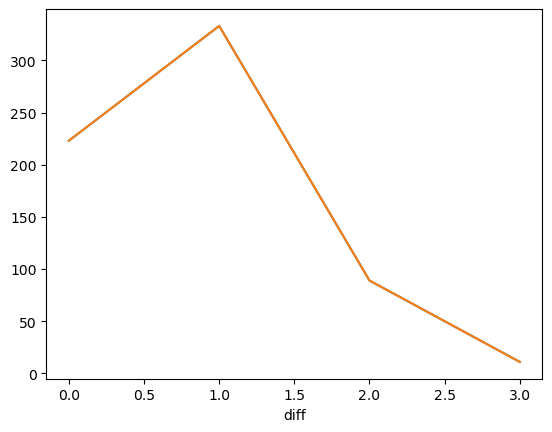

In [390]:
predictions["diff"].round().value_counts().sort_index().plot()
plt.show()